```
Kalau kita buat listnya/summary dari perintah di module kode id :

A. Area Plot (a)
B. Histogram (a)
C. Bar Chart (a)
D. Pie Chart (a)
E. Box Plot  (a)
F. Scatter Plot (a)
G. Word Clouds
H. Folium Maps
I. Overall Analysis

*for each plot (A - F):
- Question/what data we want to visualize
- Pre-processing if needed
- (a)or analysis :: Conclusion / Kesimpulan
```

In [3]:
# Bagian untuk Import Package yang dibutuhkan
import numpy as np
import pandas as pd
from PIL import Image # converting images into arrays

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use(['ggplot'])


---
# A. Area Plot

## Question
Membandingkan kejahatan tertinggi dan terendah pada daerah Croydon

## Pre-processing if needed
**Pre-processing if needed** // Student melakukan preproses dataset sebelum menerapkan visualisasi

In [4]:
# Import atau read dataset dan membuat menjadi dataframe
df_london_crime = pd.read_csv('london_crime_by_lsoa.csv')

In [5]:
# Melihat bagian awal pada isi dataset
print("Display the top five rows of dataset")
df_london_crime.head(5)

Display the top five rows of dataset


,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
# Melihat isi dataset dari bagian akhir
df_london_crime.tail(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [56]:
# Melihat dimensi pada dataframe
print("To print the dimension of dataframe")
print(df_london_crime.shape)

To print the dimension of dataframe
(13490604, 7)


In [6]:
# Menampilkan kolom values
print("To display column values ")
df_london_crime.columns.values

To display column values 


array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [7]:
# Menampilkan index values pada dataframe london crime
df_london_crime.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [8]:
# Mengecek isi dari columns borough
df_london_crime.borough

0              Croydon
1            Greenwich
2              Bromley
3            Redbridge
4           Wandsworth
               ...    
13490599         Brent
13490600    Hillingdon
13490601        Sutton
13490602       Croydon
13490603        Merton
Name: borough, Length: 13490604, dtype: object

In [9]:
# Memeriksa apakah terdapat missing value dan sejenisnya pada dataframe
print("To check if any column has null values")
print(df_london_crime.isnull().any())

To check if any column has null values
lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool


In [10]:
print(df_london_crime.columns)

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')


In [11]:
"""
Melakukan pengelompokkan berdasarkan major category
untuk mengetahui jenis kejahatan yang tertinggi dan terendah pada daerah Croydon

Kemudian menghilangkan kolom month karena tidak dibutuhkan
"""
df_area_croydon_mm = df_london_crime[df_london_crime['borough'] == 'Croydon'].groupby(['year', 'major_category']).sum()
df_area_croydon_mm.drop(columns=['month'], inplace=True)
df_area_croydon_mm

value
year major_category                    
2008 Burglary                      3737
     Criminal Damage               4511
     Drugs                         2798
     Fraud or Forgery               270
     Other Notifiable Offences      386
...                                 ...
2016 Other Notifiable Offences      718
     Robbery                       1139
     Sexual Offences                  0
     Theft and Handling            9229
     Violence Against the Person  10302

[81 rows x 1 columns]

In [12]:
# Melakukan proses unstack, karena dataset ini memiliki tingkatan atau level yang terlihat dari banyaknya subkolom
# Setelah unstack, maka dibuat data frame kembali dan menampungnya di variabel yang berbeda, karena proses unstack mereturn series dan dataframe baru
df_area_croydon_mm2 = df_area_croydon_mm.unstack(level=-1)
df_area_croydon_mm2

value                                         \
major_category Burglary Criminal Damage Drugs Fraud or Forgery   
year                                                             
2008               3737            4511  2798              270   
2009               4210            4224  2534                0   
2010               4219            4002  2277                0   
2011               4619            3426  2315                0   
2012               4038            3072  2356                0   
2013               3958            2821  2079                0   
2014               3139            2830  1868                0   
2015               2718            3113  1568                0   
2016               2738            3219  1367                0   

                                                                  \
major_category Other Notifiable Offences Robbery Sexual Offences   
year                                                               
2008                                 386    1394              55   
2009                                 416    1501               0   
2010                                 425    1524               0   
2011                                 427    1762               0   
2012                                 489    1925               0   
2013                                 394    1699               0   
2014                                 506     972               0   
2015                                 579     729               0   
2016                                 718    1139               0   

                                                               
major_category Theft and Handling Violence Against the Person  
year                                                           
2008                         9604                        6761  
2009                        10026                        6873  
2010                        10494                        6432  
2011                        10727                        6554  
2012                        11754                        6555  
2013                        10307                        6186  
2014                         9794                        8248  
2015                         9502                        9880  
2016                         9229                       10302

## Create data visualization
**Create data visualization** // Mengimplementasikan area plot menggunakan matplotlib dengan data yang relevan dan sesuai dengan kegunaan plot/grafik

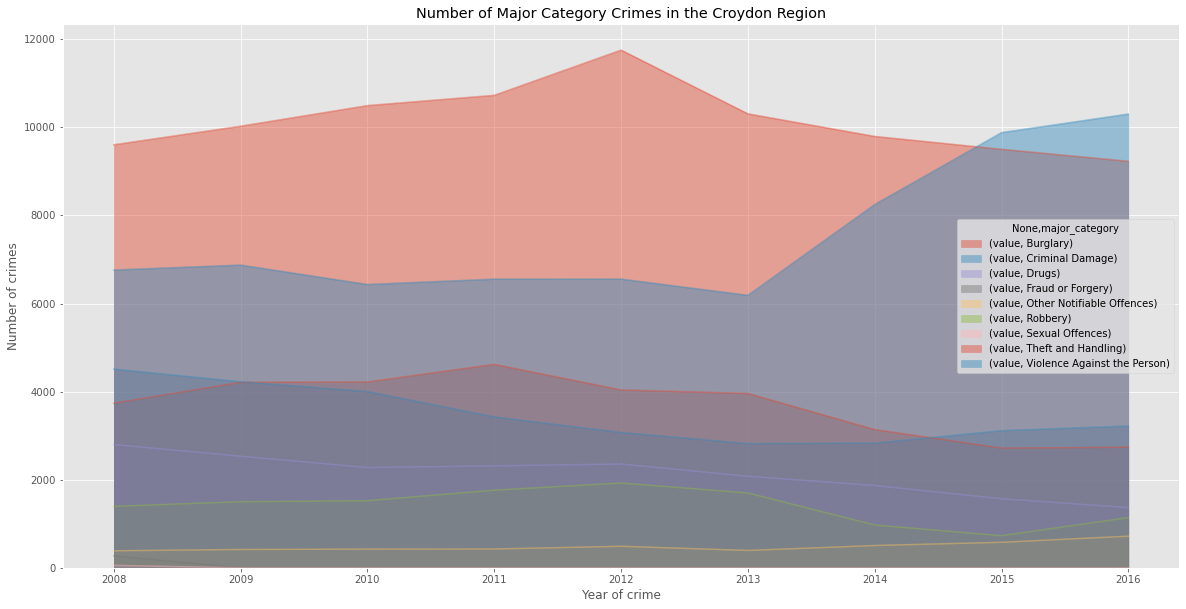

In [13]:
# 2. create visualization
# Membuat area plot dari dataframe yang sudah disiapkan
df_area_croydon_mm2.plot(kind='area', figsize=(20, 10), alpha=0.45, stacked=False)
plt.title('Number of Major Category Crimes in the Croydon Region')
plt.ylabel('Number of crimes')
plt.xlabel('Year of crime')

# add legend
# plt.legend(labels=df_area_croydon_mm2, loc='upper left')
plt.show()

## Conclusion
**Conclusion** // *Menarik informasi/kesimpulan berdasarkan area plot yang telah student buat*



In [85]:
# 3. conclusion
"""
Berdasarkan dari tampilan grafik dibagian data visualization, maka dapat diketahui urutan kejahatan pada Daerah Croydon.
Berdasarkan grafik dibagian data visualization diketahui bawah, kejahatan tertinggi pada Daerah Croydon yaitu:
1. Theft and Handling
2. Violence Againts The Person
"""

'\nBerdasarkan dari tampilan grafik dibagian data visualization, maka dapat diketahui urutan kejahatan pada Daerah Croydon.\nBerdasarkan grafik dibagian data visualization diketahui bawah, kejahatan tertinggi pada Daerah Croydon yaitu:\n1. Theft and Handling\n2. Violence Againts The Person\n'

---
# B. Histogram

## Question
Menampilkan grafik distribusi kejahatan pada daearah Croydon berdasarkan tahun

## Pre-processing if needed
Mengambil dataframe yang sebelumnya, maka pre-processing tidak diperlukan

## Create data visualization

In [167]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_area_croydon_mm2)
print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[30 12 12  9  0  6  0  2  8  2]
[    0.   1175.4  2350.8  3526.2  4701.6  5877.   7052.4  8227.8  9403.2
 10578.6 11754. ]


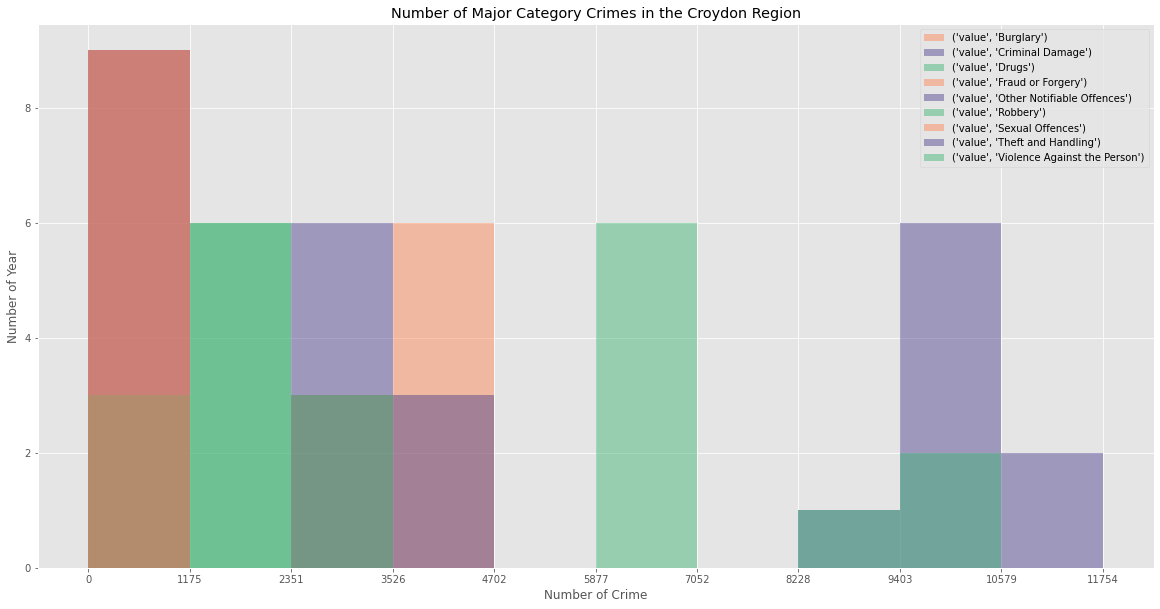

In [172]:
# 2. create visualization
df_area_croydon_mm2.plot(kind='hist', figsize=(20, 10), alpha=0.45, color=['coral', 'darkslateblue', 'mediumseagreen'], xticks=bin_edges)
plt.title('Number of Major Category Crimes in the Croydon Region')
plt.ylabel('Number of Year')
plt.xlabel('Number of Crime')

# add legend
plt.legend(labels=df_area_croydon_mm2, loc='upper right')
plt.show()

## Conclusion

In [18]:
"""
Pada grafik yang ditampilkan menunjukkan penyebaran kejahatan major_category yang terjadi pada daerah Croydon
"""

---
# C. Bar Chart


## Question
Menampilkan kejahatan major dan minor category tahun 2010 pada daerah Croydon

## Pre-processing if needed

In [3]:
# 1. pre-processing if needed
# Membuat dataframe baru yang mengambil borough 'Croydon' dan year = 2010
df_croydon = df_london_crime[
    (df_london_crime['borough'] == 'Croydon') &
    (df_london_crime['year'] == 2010)
].groupby(['major_category', 'minor_category']).sum()

# Membuang atau menghapus kolom month karena tidak diperlukan
df_croydon.drop(columns=['month', 'year'], inplace=True)

# Menampilkan dataframe
df_croydon

value
major_category              minor_category                               
Burglary                    Burglary in Other Buildings              1414
                            Burglary in a Dwelling                   2805
Criminal Damage             Criminal Damage To Dwelling              1086
                            Criminal Damage To Motor Vehicle         1787
                            Criminal Damage To Other Building         404
                            Other Criminal Damage                     725
Drugs                       Drug Trafficking                          148
                            Other Drugs                                 8
                            Possession Of Drugs                      2121
Fraud or Forgery            Counted per Victim                          0
                            Other Fraud & Forgery                       0
Other Notifiable Offences   Going Equipped                             16
                            Other Notifiable                          409
Robbery                     Business Property                         189
                            Personal Property                        1335
Sexual Offences             Other Sexual                                0
                            Rape                                        0
Theft and Handling          Handling Stolen Goods                      59
                            Motor Vehicle Interference & Tampering    184
                            Other Theft                              3548
                            Other Theft Person                        653
                            Theft From Motor Vehicle                 2947
                            Theft From Shops                         1659
                            Theft/Taking Of Motor Vehicle            1132
                            Theft/Taking of Pedal Cycle               312
Violence Against the Person Assault with Injury                      2382
                            Common Assault                           1802
                            Harassment                               1455
                            Murder                                      6
                            Offensive Weapon                          235
                            Other violence                            255
                            Wounding/GBH                              297

## Create data visualization

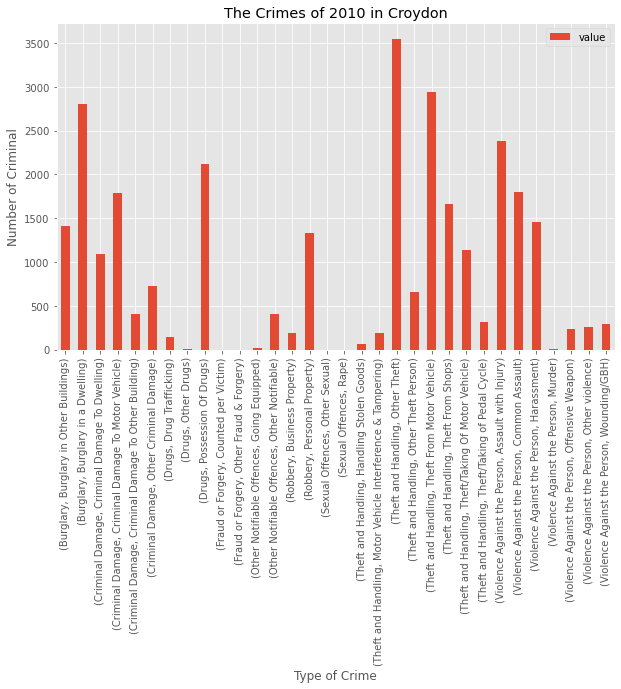

In [4]:
# 2. create visualization
df_croydon.plot(
    kind='bar',
    figsize=(10, 6))

plt.title('The Crimes of 2010 in Croydon')
plt.ylabel('Number of Criminal')
plt.xlabel('Type of Crime')
plt.show()

## Conclusion

In [5]:
# 3. conclusion
"""
Dari tampilan bar chart dapat diambil kesimpulan,
bahwa pada Tahun 2010 di Daerah Croydon jumlah kejahatan yang tertinggi adalah
Theft and Handling, Other Theft
"""

'\nDari tampilan bar chart dapat diambil kesimpulan,\nbahwa pada Tahun 2010 di Daerah Croydon jumlah kejahatan yang tertinggi adalah\nTheft and Handling, Other Theft\n'

---
# D. Pie Chart

## Question
Menampilkan jumlah kejahatan pada daerah Croydon berdasarkan minor_category

## Pre-processing If Needed

In [6]:
# 1. pre-processing if needed
df_croydon_crime = df_london_crime[df_london_crime['borough'] == 'Croydon'].groupby(['minor_category']).sum()
df_croydon_crime.drop(columns=['month', 'year'], inplace=True)
df_croydon_crime

,value
minor_category,
Assault with Injury,21322
Burglary in Other Buildings,11268
Burglary in a Dwelling,22108
Business Property,1373
Common Assault,18363
Counted per Victim,231
Criminal Damage To Dwelling,8035
Criminal Damage To Motor Vehicle,13353
Criminal Damage To Other Building,3235


In [8]:
# Untuk merapihkan pie chart, menggunakan condition value > 500
df_croydon_crime2 = df_croydon_crime[df_croydon_crime['value'] > 2000]
df_croydon_crime2

,value
minor_category,
Assault with Injury,21322
Burglary in Other Buildings,11268
Burglary in a Dwelling,22108
Common Assault,18363
Criminal Damage To Dwelling,8035
Criminal Damage To Motor Vehicle,13353
Criminal Damage To Other Building,3235
Harassment,17898
Motor Vehicle Interference & Tampering,2119


## Create Data Visualization

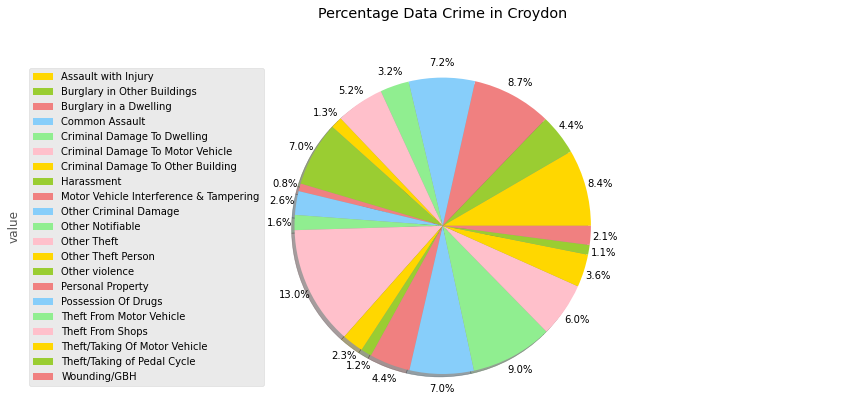

In [12]:
# 2. create visualization
colors_list = ['gold', 'yellowgreen', 'lightcoral',
               'lightskyblue', 'lightgreen', 'pink']

df_croydon_crime2.plot.pie(y='value', figsize=(15, 6), autopct='%1.1f%%',
                         shadow=True, labels=None, pctdistance=1.1, colors=colors_list)
plt.title('Percentage Data Crime in Croydon', y=1.12)
plt.axis('equal')

# add legend
plt.legend(labels=df_croydon_crime2.index, loc='upper left')
plt.show()

## Conclusion

In [25]:
# 3. conclusion
# Terlihat pada Pie Chart, jenis kejahatan tertinggi yaitu Other Theft sebesar 13.0%

---
# E. Box Plot

## Question
Membandingkan banyaknya kejahatan antara dua daerah yaitu Croydon dan Greenwich

## Pre-processsing if needed

In [13]:
# 1. pre-processing if needed
# Memfilter jumlah kejahatan berdasarkan daerah yaitu Croydon yang dikelompokkan berdasarkan tahun
df_comparison = df_london_crime[
    (df_london_crime['borough'] == 'Croydon')
].groupby(['year']).sum()
df_comparison.drop(columns=['month'], inplace=True)
df_comparison

,value
year,
2008,29516
2009,29784
2010,29373
2011,29830
2012,30189
2013,27444
2014,27357
2015,28089
2016,28712


## Create data visualization

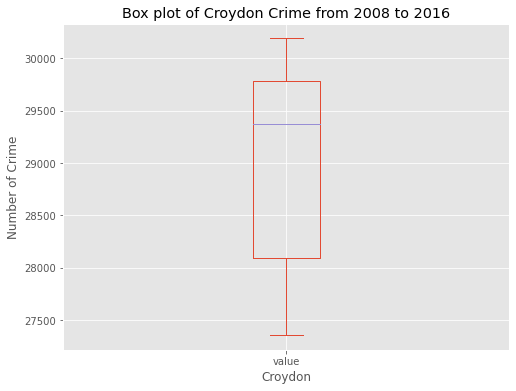

In [15]:
# 2. create visualization
df_comparison.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Croydon Crime from 2008 to 2016')
plt.xlabel('Croydon')
plt.ylabel('Number of Crime')

plt.show()

## Conclusion

In [16]:
"""
Dari tampilan box plot chart dapat diambil kesimpulan,
bahwa pada dari tahun 2008 - 2016 di Daerah Croydon,
jumlah kejahatan tertinggi atau nilak maksimumnya > 30.000
jumlah kejahatan minimumnya adalah < 27.500
nilai mediannya > 29.000 & < 29.500
"""

'\nDari tampilan box plot chart dapat diambil kesimpulan,\nbahwa pada dari tahun 2008 - 2016 di Daerah Croydon,\njumlah kejahatan tertinggi atau nilak maksimumnya > 30.000\njumlah kejahatan minimumnya adalah < 27.500\nnilai mediannya > 29.000 & < 29.500\n'

---
# F. Scatter Plot

## Question
Mengetahui perkembangan jumlah kejahatan dari tahun ke tahun pada daerah Croydon

## Pre-processing if needed

In [30]:
# 1. pre-processing if needed
# Membuat salinan dari dataset kemudian ditampung ke dataframe baru agar tidak merubah dataframe yang sebelumnya
crime = df_london_crime.copy()
crime.head(3)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5


In [31]:
# Rename column yang akan digunakan untuk membedekan dengan dataframe sebelumnya dan enak dipandang
rename_crime = crime.rename(
    columns={'borough':'City' ,
             'value':'Total'}
)
rename_crime.head(3)

,lsoa_code,City,major_category,minor_category,Total,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5


In [21]:
# Memfilter berdasarkan daerah 'Croydon' kemudian mengelompokkan berdasarkan tahun
# Mendrop atau menghilangkan kolom yang tidak digunakan yaitu month
# Membuat dataframe baru yang memuat dataframe sebelumnya yang sudah direset indexnya
# Tujuan mereset agar index 'year' kembali mejadi kolom dan bisa ditampilkan pada scatter plot
df_growth = rename_crime[
    (rename_crime['City'] == 'Croydon')
].groupby(['year']).sum()
df_growth.drop(columns=['month'], inplace=True)
df_growth2 = df_growth.reset_index()
df_growth2

,year,Total
0,2008,29516
1,2009,29784
2,2010,29373
3,2011,29830
4,2012,30189
5,2013,27444
6,2014,27357
7,2015,28089
8,2016,28712


## Create data visualization

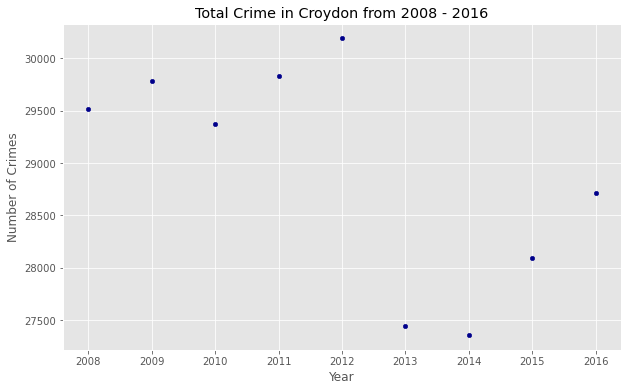

In [19]:
# 2. create visualization
df_growth2.plot(kind='scatter', x='year', y='Total', figsize=(10, 6), color='darkblue')

plt.title('Total Crime in Croydon from 2008 - 2016')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

plt.show()

## Conclusion

In [20]:
# 3. conclusion
"""
Pada grafik yang sudah ditampilkan, dapat diambil kesimpulan bahwa urutan jumlah kejahatan
dari terbesar hingga terkecil berdasarkan tahun pada daerah Croydon sebagai berikut:
1. 2012 = 30189
2. 2011 = 29830
3. 2009 = 29784
4. 2008 = 29516
5. 2010 = 29373
6. 2016 = 28712
7. 2015 = 28089
8. 2013 = 27444
9. 2014 = 27357 
Dan diketahui bahwa kejahatan terbesar terjadi pada tahun 2012 sebanyak 30189
"""

'\nPada grafik yang sudah ditampilkan, dapat diambil kesimpulan bahwa urutan jumlah kejahatan\ndari terbesar hingga terkecil berdasarkan tahun pada daerah Croydon sebagai berikut:\n1. 2012 = 30189\n2. 2011 = 29830\n3. 2009 = 29784\n4. 2008 = 29516\n5. 2010 = 29373\n6. 2016 = 28712\n7. 2015 = 28089\n8. 2013 = 27444\n9. 2014 = 27357 \nDan diketahui bahwa kejahatan terbesar terjadi pada tahun 2012 sebanyak 30189\n'

---
# G. Word Clouds

## Question_1
Menampilkan data menggunakan word cloud dari dataset london_crime

## Pre-processing if needed

In [17]:
# Install package
from wordcloud import WordCloud, STOPWORDS
print('Wordcloud is installed and imported')

Wordcloud is installed and imported


In [27]:
"""
# reading csv file
text = open("london_crime_by_lsoa.csv", "r")

# joining with space content of text
text = ' '.join([i for i in text])  
  
# replacing ',' by space
text = text.replace(",", " ")  
  
#displaying result
print(text)
"""

'\n# reading csv file\ntext = open("london_crime_by_lsoa.csv", "r")\n\n# joining with space content of text\ntext = \' \'.join([i for i in text])  \n  \n# replacing \',\' by space\ntext = text.replace(",", " ")  \n  \n#displaying result\nprint(text)\n'

In [8]:
# open the file and read it into a variable london_crime
london_crime = open('london_crime_by_lsoa.txt', 'r').read()

print('File downloaded and saved!')

File downloaded and saved!


In [78]:
stopwords = set(STOPWORDS)

In [10]:
# instantiate a word cloud object
london_crime_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
london_crime_wc.generate(london_crime)

## Create data visualization

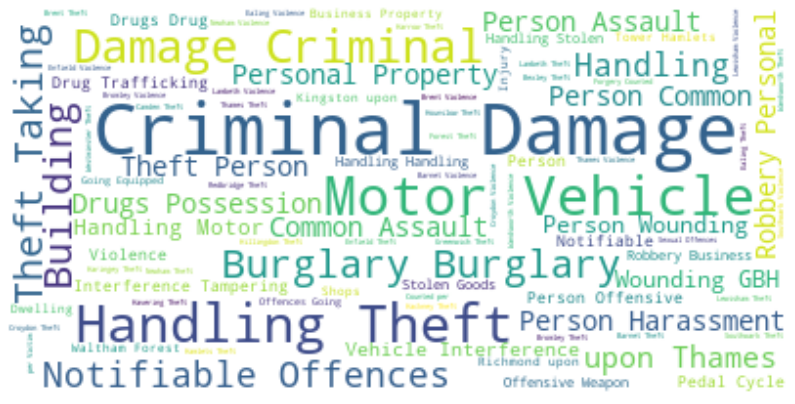

In [31]:
# Merubah ukuran agar dapat display word jarang digunakan
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

# display the cloud
plt.imshow(london_crime_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
# Membuat kata dalam bentuk mask
# save mask to alice_mask
london_crime_mask = np.array(Image.open('sherlock_holmes_mask_255.jpeg'))

print('Image downloaded and saved!')

Image downloaded and saved!


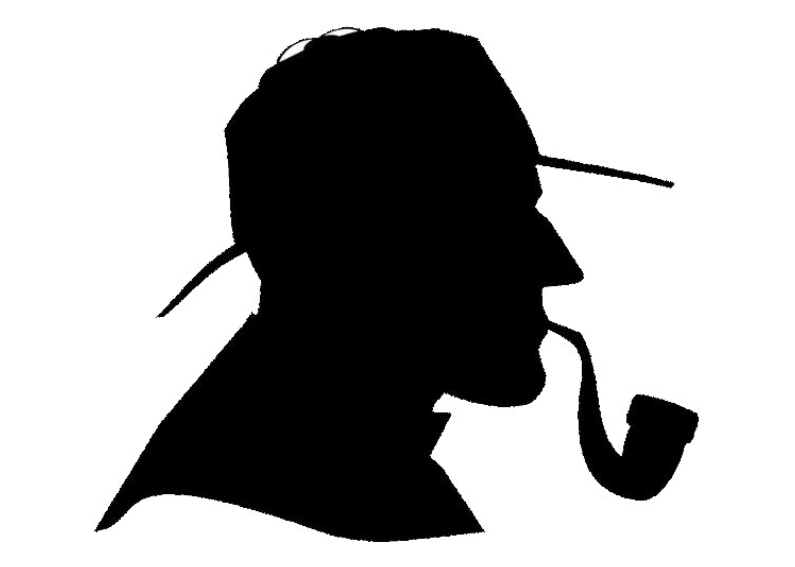

In [21]:
# display the mask
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(london_crime_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

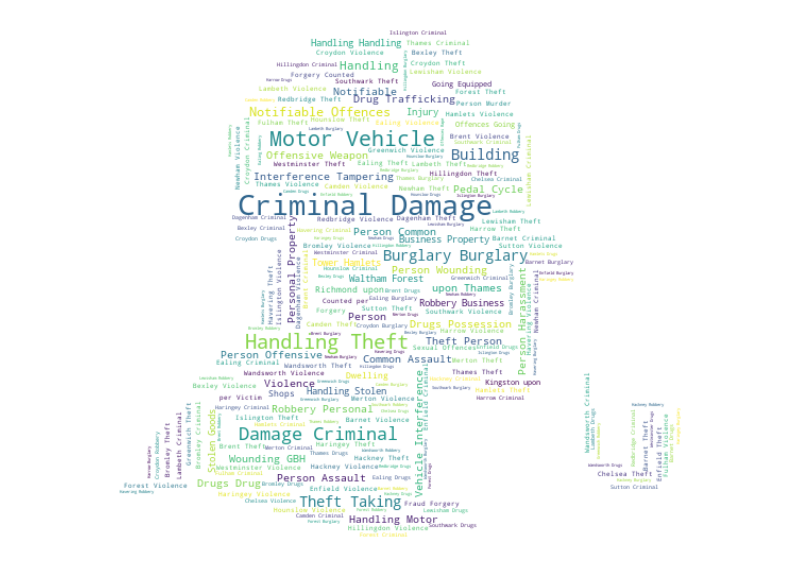

In [26]:
# instantiate a word cloud object
london_crime_wc = WordCloud(
    background_color='white',
    max_words=2000,
    mask=london_crime_mask,
    stopwords=stopwords,
)

# generate the word cloud
london_crime_wc.generate(london_crime)

# display the mask
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(london_crime_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Conclusion_1

In [27]:
# 3. conclusion
# Pada visualisasi word cloud diatas, terdapat informasi mengenai kata yang sering muncul, yaitu 'Criminal Damage'

## Question_2
Menampilkan daerah yang paling banyak terjadi kejahatan menggunakan word cloud

## Pre-processing if needed_2

In [19]:
total_crime = df_london_crime['value'].sum()
total_crime

6447758

In [20]:
df_croydon_wc = df_london_crime.groupby(['borough']).sum()
df_croydon_wc.drop(columns=['year', 'month'])

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


In [21]:
# Menggunakan City dengan nama satu kata, dan duplikat masing-masing borough bedasarkan seberapa besar total kejahatannya
max_words = 90
word_string = ''
for borough in df_croydon_wc.index.values:
    #check if borough's name is a single-word namer
    if len(borough.split(' ')) == 1:
        repeat_num_times = int(df_croydon_wc.loc[borough, 'value']/float(total_crime)*max_words)
        word_string = word_string + ((borough+ ' ') * repeat_num_times)

#display the generated text
word_string

'Barnet Barnet Bexley Brent Brent Brent Bromley Bromley Camden Camden Camden Croydon Croydon Croydon Ealing Ealing Ealing Enfield Enfield Greenwich Greenwich Hackney Hackney Hackney Haringey Haringey Harrow Havering Hillingdon Hillingdon Hounslow Hounslow Islington Islington Islington Lambeth Lambeth Lambeth Lambeth Lewisham Lewisham Lewisham Merton Newham Newham Newham Redbridge Redbridge Southwark Southwark Southwark Sutton Wandsworth Wandsworth Westminster Westminster Westminster Westminster Westminster Westminster '

## Create data visualization_2

In [73]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created')

Word cloud created


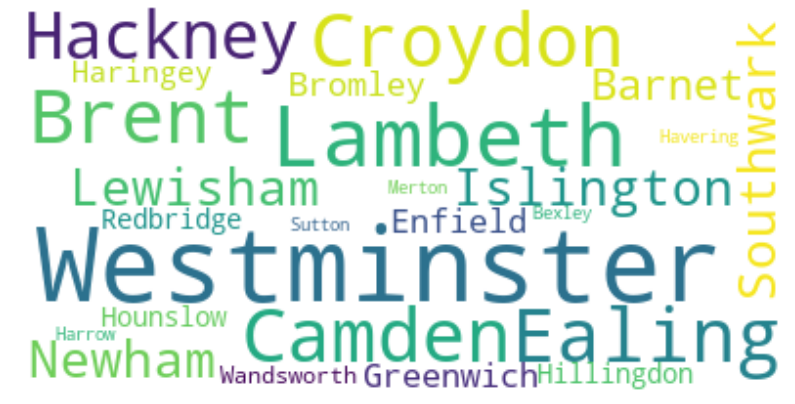

In [74]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Conclusion_2

In [75]:
# Pada wordcloud diatas menunjukkan bahwa daerah yang paling banyak jumlah kejahatannya adalah Westminster

---

## Question_3
Menampilkan jenis kejahatan terbanyak pada daerah Cryodon menggunakan word cloud

## Pre-processing if needed_3

In [76]:
# Membuat dataframe baru agar tidak menimpa yang sebelumnya
df_new_crime = df_london_crime.copy()
df_new_crime.head(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [8]:
# Membuat variabel total_crime2 yang nantinya akan digunakan
total_crime2 = df_copy['value'].sum()
total_crime2

6447758

In [78]:
# Rename columns dan index dan menampung ke dataframe baru
df_baru = df_new_crime.rename(
    columns={'major_category': 'Major'},
    index={
        'Violence Against the Person': 'Violence',
        'Criminal Damage': 'Criminal',
        'Fraud or Forgery': 'Fraud',
        'Other Notifiable Offences': 'Offences',
        'Sexual Offences': 'Sexual',
        'Theft and Handling': 'Theft',
    })
print(df_baru)

          lsoa_code     borough                        Major  \
0         E01001116     Croydon                     Burglary   
1         E01001646   Greenwich  Violence Against the Person   
2         E01000677     Bromley  Violence Against the Person   
3         E01003774   Redbridge                     Burglary   
4         E01004563  Wandsworth                      Robbery   
...             ...         ...                          ...   
13490599  E01000504       Brent              Criminal Damage   
13490600  E01002504  Hillingdon                      Robbery   
13490601  E01004165      Sutton                     Burglary   
13490602  E01001134     Croydon                      Robbery   
13490603  E01003413      Merton  Violence Against the Person   

                       minor_category  value  year  month  
0         Burglary in Other Buildings      0  2016     11  
1                      Other violence      0  2016     11  
2                      Other violence      0  2015 

In [79]:
# Memfilter daerah dan menghapus kolom yang tidak diperlukan
df_croydon_wc2 = df_new[
    (df_new['borough'] == 'Croydon')
].groupby(['Major']).sum()
df_croydon_wc2.drop(columns=['year', 'month'])

,value
Major,
Burglary,33376
Criminal Damage,31218
Drugs,19162
Fraud or Forgery,270
Other Notifiable Offences,4340
Robbery,12645
Sexual Offences,55
Theft and Handling,91437
Violence Against the Person,67791


In [83]:
# Menggunakan Major dengan nama satu kata, dan duplikat masing-masing borough bedasarkan seberapa besar total kejahatannya
max_words2 = 100000
word_string2 = ''
for Major in df_croydon_wc2.index.values:
    repeat_num_times = int(
        df_croydon_wc2.loc[Major, 'value']/float(total_crime2)*max_words2)
    word_string2 = word_string2 + ((Major + ' ') * repeat_num_times)

# display the generated text
word_string2

'Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary 

## Create Data Visualization_3

In [81]:
# create another word cloud
wordcloud2 = WordCloud(background_color='white').generate(word_string2)

print('Word cloud created')

Word cloud created


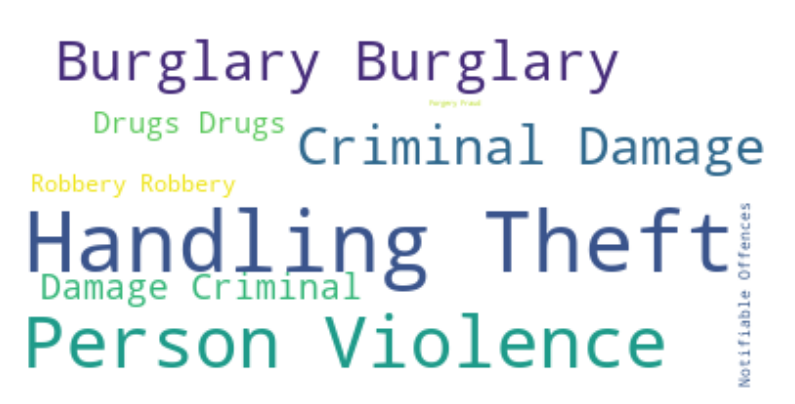

In [82]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

## Conclusion_3

In [84]:
# Pada word cloud diatas menunjukkan bahwa pada daerah Croydon, kejahatan paling banyak terjadi adalah Theft and Handling

# H. Folium Maps

## Question_1
Create a map of Croydon with a zoom level of 15

## Pre-processing if needed

In [40]:
import folium

print('Folium installed and imported')

Folium installed and imported


In [43]:
# defined the world map
world_map = folium.Map()

## Create visualization

In [116]:
# create a Stament Toner map of the world centered around Croydon
world_map = folium.Map(location=[51.3769816455489, -0.09568694311697651], zoom_start=20,
                      tiles='Stamen Terrain')

# display world map
world_map

## Pre-processing if needed_2

In [51]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
crime = crime.iloc[0:limit, :]

In [52]:
crime.shape

(100, 7)

In [103]:
crime.head(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [111]:
# Croydon latitude and longitude values
latitude = 51.3769816455489
longitude = -0.09568694311697651

In [112]:
# create map and display it
croydon_map = folium.Map(location=[latitude, longitude], zoom_start=20)

# display the map of San Francisco
croydon_map

In [115]:
# Declare a list that is to be converted into a column
# X = [-0.095830, -0.095830, -0.095628, -0.095405]
# Y = [51.376981, 51.376981, 51.377097, 51.377025]
 
# Using 'Address' as the column name
# and equating it to the list
# crime['Y'] = Y

# I. Overall Conclusion

In [ ]:
"""
Berdasarkan analsisi yang sudah dilakukan dengan berbagai macam cara baik itu penggunaan chart, word cloud, dan folium
Didapatkan hasil bahwa jenis kejahatan major yang paling banyak terjadi pada daerah Croydon adalah Theft and Handling.
Sementara untuk jenis kejahatan minor yang paling banyak terjadi adalah Theft and Handling, Other Theft.
"""